In [1]:
%run utils.ipynb

In [2]:
model_fog = get_model_instance_segmentation(2)
model_fog.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [3]:
# fog
weather = 'dataset/train/fog'
model = model_fog
num_epochs = 3
lr=0.0001
optimizer = torch.optim.Adam(model.parameters(), lr)

dataset = RadarDataset(data_transform, "./"+weather+"/images_train/")
val_dataset = RadarDataset(data_transform, "./"+weather+"/images_val/")
data_loader = torch.utils.data.DataLoader(dataset, batch_size=2, collate_fn=collate_fn, num_workers=1, shuffle=True)
val_data_loader = torch.utils.data.DataLoader(val_dataset, batch_size=2, collate_fn=collate_fn, num_workers=1, shuffle=False)

mean_epoch_loss_list = []
mean_val_epoch_loss_list = []

print('----------------------train start--------------------------')

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    val_epoch_loss = 0
    
    # Valdiation data
    for imgs, targets in tqdm(val_data_loader, 'Iterating valdiation dataset'):
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        with torch.no_grad():
            loss_dict = model(imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        val_epoch_loss += losses.item()
    mean_val_epoch_loss = val_epoch_loss/len(val_data_loader)

    # Train data
    for imgs, targets in tqdm(data_loader, 'Iterating train dataset'):
        optimizer.zero_grad()
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        loss_dict = model(imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        epoch_loss += losses.item()
        losses.backward()
        optimizer.step()
    mean_epoch_loss = epoch_loss/len(data_loader)
        
    mean_epoch_loss_list.append(mean_epoch_loss) 
    mean_val_epoch_loss_list.append(mean_val_epoch_loss)
    
    torch.save(model.state_dict(), './model/fog_+'+str(epoch+1)+'.pt')
    print(f'epoch : {epoch+1}, Train Loss : {mean_epoch_loss}, Val Loss : {mean_val_epoch_loss}')

----------------------train start--------------------------


Iterating train dataset: 100%|████████████████| 419/419 [01:53<00:00,  3.68it/s]


epoch : 1, Train Loss : 0.17483695793834678, Val Loss : 2.637951374053955


Iterating train dataset: 100%|████████████████| 419/419 [01:55<00:00,  3.62it/s]


epoch : 2, Train Loss : 0.12348641190224445, Val Loss : 0.1391345506104139


Iterating train dataset: 100%|████████████████| 419/419 [01:56<00:00,  3.61it/s]


epoch : 3, Train Loss : 0.10119015090878795, Val Loss : 0.14096834331464309


In [4]:
# fog
num_epochs = 12
lr=0.00001
optimizer = torch.optim.Adam(model.parameters(), lr)

dataset = RadarDataset(data_transform, "./"+weather+"/images_train/")
val_dataset = RadarDataset(data_transform, "./"+weather+"/images_val/")
data_loader = torch.utils.data.DataLoader(dataset, batch_size=2, collate_fn=collate_fn, num_workers=1, shuffle=True)
val_data_loader = torch.utils.data.DataLoader(val_dataset, batch_size=2, collate_fn=collate_fn, num_workers=1, shuffle=False)

mean_epoch_loss_list = []
mean_val_epoch_loss_list = []

print('----------------------train start--------------------------')

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    val_epoch_loss = 0
    
    # Valdiation data
    for imgs, targets in tqdm(val_data_loader, 'Iterating valdiation dataset'):
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        with torch.no_grad():
            loss_dict = model(imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        val_epoch_loss += losses.item()
    mean_val_epoch_loss = val_epoch_loss/len(val_data_loader)

    # Train data
    for imgs, targets in tqdm(data_loader, 'Iterating train dataset'):
        optimizer.zero_grad()
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        loss_dict = model(imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        epoch_loss += losses.item()
        losses.backward()
        optimizer.step()
    mean_epoch_loss = epoch_loss/len(data_loader)
        
    mean_epoch_loss_list.append(mean_epoch_loss) 
    mean_val_epoch_loss_list.append(mean_val_epoch_loss)
    
    torch.save(model.state_dict(), './model/fog_+'+str(epoch+4)+'.pt')
    print(f'epoch : {epoch+4}, Train Loss : {mean_epoch_loss}, Val Loss : {mean_val_epoch_loss}')

----------------------train start--------------------------


Iterating train dataset: 100%|████████████████| 419/419 [01:56<00:00,  3.60it/s]


epoch : 4, Train Loss : 0.07116496987054058, Val Loss : 0.1330178530456928


Iterating train dataset: 100%|████████████████| 419/419 [01:56<00:00,  3.60it/s]


epoch : 5, Train Loss : 0.0619713526468075, Val Loss : 0.09908984320309873


Iterating train dataset: 100%|████████████████| 419/419 [01:56<00:00,  3.60it/s]


epoch : 6, Train Loss : 0.05647096805372286, Val Loss : 0.10817347087252599


Iterating train dataset: 100%|████████████████| 419/419 [01:56<00:00,  3.59it/s]


epoch : 7, Train Loss : 0.05114766422699168, Val Loss : 0.11219112499831961


Iterating train dataset: 100%|████████████████| 419/419 [01:56<00:00,  3.60it/s]


epoch : 8, Train Loss : 0.04622934371019605, Val Loss : 0.11983312951185955


Iterating train dataset: 100%|████████████████| 419/419 [01:56<00:00,  3.59it/s]


epoch : 9, Train Loss : 0.04164200832818352, Val Loss : 0.1256531249695959


Iterating train dataset: 100%|████████████████| 419/419 [01:56<00:00,  3.60it/s]


epoch : 10, Train Loss : 0.03775317559734449, Val Loss : 0.11595106499197964


Iterating train dataset: 100%|████████████████| 419/419 [01:56<00:00,  3.59it/s]


epoch : 11, Train Loss : 0.034398214892664286, Val Loss : 0.12421758179194652


Iterating train dataset: 100%|████████████████| 419/419 [01:56<00:00,  3.60it/s]


epoch : 12, Train Loss : 0.03153653178021738, Val Loss : 0.13552436880015123


Iterating train dataset: 100%|████████████████| 419/419 [01:55<00:00,  3.61it/s]


epoch : 13, Train Loss : 0.028590434080829983, Val Loss : 0.1432384341202963


Iterating train dataset: 100%|████████████████| 419/419 [01:56<00:00,  3.61it/s]


epoch : 14, Train Loss : 0.02610530163581552, Val Loss : 0.14025389370866692


Iterating train dataset: 100%|████████████████| 419/419 [01:56<00:00,  3.61it/s]


epoch : 15, Train Loss : 0.02370593074302418, Val Loss : 0.1415902213909878


In [5]:
model_rain = get_model_instance_segmentation(2)
model_rain.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [6]:
# rain
weather = 'dataset/train/rain'
model = model_rain
num_epochs = 3
lr=0.0001
optimizer = torch.optim.Adam(model.parameters(), lr)

dataset = RadarDataset(data_transform, "./"+weather+"/images_train/")
val_dataset = RadarDataset(data_transform, "./"+weather+"/images_val/")
data_loader = torch.utils.data.DataLoader(dataset, batch_size=2, collate_fn=collate_fn, num_workers=1, shuffle=True)
val_data_loader = torch.utils.data.DataLoader(val_dataset, batch_size=2, collate_fn=collate_fn, num_workers=1, shuffle=False)

mean_epoch_loss_list = []
mean_val_epoch_loss_list = []

print('----------------------train start--------------------------')

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    val_epoch_loss = 0
    
    # Valdiation data
    for imgs, targets in tqdm(val_data_loader, 'Iterating valdiation dataset'):
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        with torch.no_grad():
            loss_dict = model(imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        val_epoch_loss += losses.item()
    mean_val_epoch_loss = val_epoch_loss/len(val_data_loader)

    # Train data
    for imgs, targets in tqdm(data_loader, 'Iterating train dataset'):
        optimizer.zero_grad()
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        loss_dict = model(imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        epoch_loss += losses.item()
        losses.backward()
        optimizer.step()
    mean_epoch_loss = epoch_loss/len(data_loader)
        
    mean_epoch_loss_list.append(mean_epoch_loss) 
    mean_val_epoch_loss_list.append(mean_val_epoch_loss)
    
    torch.save(model.state_dict(), './model/rain_+'+str(epoch+1)+'.pt')
    print(f'epoch : {epoch+1}, Train Loss : {mean_epoch_loss}, Val Loss : {mean_val_epoch_loss}')

----------------------train start--------------------------


Iterating train dataset: 100%|██████████████| 1281/1281 [05:54<00:00,  3.61it/s]


epoch : 1, Train Loss : 0.43871650569705084, Val Loss : 5.663749677687884


Iterating train dataset: 100%|██████████████| 1281/1281 [05:55<00:00,  3.60it/s]


epoch : 2, Train Loss : 0.35407650851114575, Val Loss : 0.38740798565559087


Iterating train dataset: 100%|██████████████| 1281/1281 [05:56<00:00,  3.60it/s]


epoch : 3, Train Loss : 0.3162381831414061, Val Loss : 0.34071120764128865


In [7]:
# rain
num_epochs = 12
lr=0.00001
optimizer = torch.optim.Adam(model.parameters(), lr)

dataset = RadarDataset(data_transform, "./"+weather+"/images_train/")
val_dataset = RadarDataset(data_transform, "./"+weather+"/images_val/")
data_loader = torch.utils.data.DataLoader(dataset, batch_size=2, collate_fn=collate_fn, num_workers=1, shuffle=True)
val_data_loader = torch.utils.data.DataLoader(val_dataset, batch_size=2, collate_fn=collate_fn, num_workers=1, shuffle=False)

mean_epoch_loss_list = []
mean_val_epoch_loss_list = []

print('----------------------train start--------------------------')

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    val_epoch_loss = 0
    
    # Valdiation data
    for imgs, targets in tqdm(val_data_loader, 'Iterating valdiation dataset'):
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        with torch.no_grad():
            loss_dict = model(imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        val_epoch_loss += losses.item()
    mean_val_epoch_loss = val_epoch_loss/len(val_data_loader)

    # Train data
    for imgs, targets in tqdm(data_loader, 'Iterating train dataset'):
        optimizer.zero_grad()
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        loss_dict = model(imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        epoch_loss += losses.item()
        losses.backward()
        optimizer.step()
    mean_epoch_loss = epoch_loss/len(data_loader)
        
    mean_epoch_loss_list.append(mean_epoch_loss) 
    mean_val_epoch_loss_list.append(mean_val_epoch_loss)
    
    torch.save(model.state_dict(), './model/rain_+'+str(epoch+4)+'.pt')
    print(f'epoch : {epoch+4}, Train Loss : {mean_epoch_loss}, Val Loss : {mean_val_epoch_loss}')

----------------------train start--------------------------


Iterating train dataset: 100%|██████████████| 1281/1281 [05:55<00:00,  3.60it/s]


epoch : 4, Train Loss : 0.23819700293504661, Val Loss : 0.36376590668223796


Iterating train dataset: 100%|██████████████| 1281/1281 [05:54<00:00,  3.61it/s]


epoch : 5, Train Loss : 0.21122636215922705, Val Loss : 0.2973653349559754


Iterating train dataset: 100%|██████████████| 1281/1281 [05:54<00:00,  3.61it/s]


epoch : 6, Train Loss : 0.19345292062218725, Val Loss : 0.29157865510787817


Iterating train dataset: 100%|██████████████| 1281/1281 [05:54<00:00,  3.61it/s]


epoch : 7, Train Loss : 0.17493614464835391, Val Loss : 0.30139002823270855


Iterating train dataset: 100%|██████████████| 1281/1281 [05:54<00:00,  3.61it/s]


epoch : 8, Train Loss : 0.1598592849672248, Val Loss : 0.32004543803632257


Iterating train dataset: 100%|██████████████| 1281/1281 [05:55<00:00,  3.60it/s]


epoch : 9, Train Loss : 0.14581003937372977, Val Loss : 0.31092269090004265


Iterating train dataset: 100%|██████████████| 1281/1281 [05:56<00:00,  3.59it/s]


epoch : 10, Train Loss : 0.13396400773489178, Val Loss : 0.33954867196734995


Iterating train dataset: 100%|██████████████| 1281/1281 [05:55<00:00,  3.60it/s]


epoch : 11, Train Loss : 0.12141588871468333, Val Loss : 0.33739192606881263


Iterating train dataset: 100%|██████████████| 1281/1281 [05:54<00:00,  3.61it/s]


epoch : 12, Train Loss : 0.11101071658827057, Val Loss : 0.34651927534723653


Iterating train dataset: 100%|██████████████| 1281/1281 [05:54<00:00,  3.62it/s]


epoch : 13, Train Loss : 0.1030203954012778, Val Loss : 0.35437328089028597


Iterating train dataset: 100%|██████████████| 1281/1281 [05:54<00:00,  3.62it/s]


epoch : 14, Train Loss : 0.09552733468911105, Val Loss : 0.3521860182401724


Iterating train dataset: 100%|██████████████| 1281/1281 [05:54<00:00,  3.62it/s]


epoch : 15, Train Loss : 0.08892531530999932, Val Loss : 0.37745090706739576


In [8]:
model_sunny = get_model_instance_segmentation(2)
model_sunny.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [9]:
# sunny
weather = 'dataset/train/sunny'
model = model_sunny
num_epochs = 3
lr=0.0001
optimizer = torch.optim.Adam(model.parameters(), lr)

dataset = RadarDataset(data_transform, "./"+weather+"/images_train/")
val_dataset = RadarDataset(data_transform, "./"+weather+"/images_val/")
data_loader = torch.utils.data.DataLoader(dataset, batch_size=2, collate_fn=collate_fn, num_workers=1, shuffle=True)
val_data_loader = torch.utils.data.DataLoader(val_dataset, batch_size=2, collate_fn=collate_fn, num_workers=1, shuffle=False)

mean_epoch_loss_list = []
mean_val_epoch_loss_list = []

print('----------------------train start--------------------------')

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    val_epoch_loss = 0
    
    # Valdiation data
    for imgs, targets in tqdm(val_data_loader, 'Iterating valdiation dataset'):
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        with torch.no_grad():
            loss_dict = model(imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        val_epoch_loss += losses.item()
    mean_val_epoch_loss = val_epoch_loss/len(val_data_loader)

    # Train data
    for imgs, targets in tqdm(data_loader, 'Iterating train dataset'):
        optimizer.zero_grad()
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        loss_dict = model(imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        epoch_loss += losses.item()
        losses.backward()
        optimizer.step()
    mean_epoch_loss = epoch_loss/len(data_loader)
        
    mean_epoch_loss_list.append(mean_epoch_loss) 
    mean_val_epoch_loss_list.append(mean_val_epoch_loss)
    
    torch.save(model.state_dict(), './model/sunny_+'+str(epoch+1)+'.pt')
    print(f'epoch : {epoch+1}, Train Loss : {mean_epoch_loss}, Val Loss : {mean_val_epoch_loss}')

----------------------train start--------------------------


Iterating train dataset: 100%|██████████████| 1194/1194 [05:29<00:00,  3.62it/s]


epoch : 1, Train Loss : 0.1318924863740078, Val Loss : 2.0175770881191997


Iterating train dataset: 100%|██████████████| 1194/1194 [05:29<00:00,  3.63it/s]


epoch : 2, Train Loss : 0.09849277038089743, Val Loss : 0.11057387144873607


Iterating train dataset: 100%|██████████████| 1194/1194 [05:29<00:00,  3.63it/s]


epoch : 3, Train Loss : 0.0876578132635984, Val Loss : 0.09251717360527724


In [10]:
# sunny
num_epochs = 12
lr=0.00001
optimizer = torch.optim.Adam(model.parameters(), lr)

dataset = RadarDataset(data_transform, "./"+weather+"/images_train/")
val_dataset = RadarDataset(data_transform, "./"+weather+"/images_val/")
data_loader = torch.utils.data.DataLoader(dataset, batch_size=2, collate_fn=collate_fn, num_workers=1, shuffle=True)
val_data_loader = torch.utils.data.DataLoader(val_dataset, batch_size=2, collate_fn=collate_fn, num_workers=1, shuffle=False)

mean_epoch_loss_list = []
mean_val_epoch_loss_list = []

print('----------------------train start--------------------------')

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    val_epoch_loss = 0
    
    # Valdiation data
    for imgs, targets in tqdm(val_data_loader, 'Iterating valdiation dataset'):
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        with torch.no_grad():
            loss_dict = model(imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        val_epoch_loss += losses.item()
    mean_val_epoch_loss = val_epoch_loss/len(val_data_loader)

    # Train data
    for imgs, targets in tqdm(data_loader, 'Iterating train dataset'):
        optimizer.zero_grad()
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        loss_dict = model(imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        epoch_loss += losses.item()
        losses.backward()
        optimizer.step()
    mean_epoch_loss = epoch_loss/len(data_loader)
        
    mean_epoch_loss_list.append(mean_epoch_loss) 
    mean_val_epoch_loss_list.append(mean_val_epoch_loss)
    
    torch.save(model.state_dict(), './model/sunny_+'+str(epoch+4)+'.pt')
    print(f'epoch : {epoch+4}, Train Loss : {mean_epoch_loss}, Val Loss : {mean_val_epoch_loss}')

----------------------train start--------------------------


Iterating train dataset: 100%|██████████████| 1194/1194 [05:28<00:00,  3.63it/s]


epoch : 4, Train Loss : 0.06561021227701574, Val Loss : 0.08968839290608095


Iterating train dataset: 100%|██████████████| 1194/1194 [05:28<00:00,  3.63it/s]


epoch : 5, Train Loss : 0.060828953391717906, Val Loss : 0.08106895003017763


Iterating train dataset: 100%|██████████████| 1194/1194 [05:29<00:00,  3.63it/s]


epoch : 6, Train Loss : 0.05772744293263809, Val Loss : 0.08543709899305098


Iterating train dataset: 100%|██████████████| 1194/1194 [05:28<00:00,  3.63it/s]


epoch : 7, Train Loss : 0.05473714058874003, Val Loss : 0.08810682708535018


Iterating train dataset: 100%|██████████████| 1194/1194 [05:28<00:00,  3.63it/s]


epoch : 8, Train Loss : 0.05131366526258726, Val Loss : 0.08727712671728742


Iterating train dataset: 100%|██████████████| 1194/1194 [05:28<00:00,  3.63it/s]


epoch : 9, Train Loss : 0.0482553618412521, Val Loss : 0.09290317320358633


Iterating train dataset: 100%|██████████████| 1194/1194 [05:28<00:00,  3.63it/s]


epoch : 10, Train Loss : 0.04539755778075188, Val Loss : 0.0970968304439479


Iterating train dataset: 100%|██████████████| 1194/1194 [05:29<00:00,  3.63it/s]


epoch : 11, Train Loss : 0.04216213851084487, Val Loss : 0.10137502732842961


Iterating train dataset: 100%|██████████████| 1194/1194 [05:29<00:00,  3.63it/s]


epoch : 12, Train Loss : 0.03863721665141596, Val Loss : 0.10341350021678329


Iterating train dataset: 100%|██████████████| 1194/1194 [05:29<00:00,  3.62it/s]


epoch : 13, Train Loss : 0.03602875001694215, Val Loss : 0.10967114614010257


Iterating train dataset: 100%|██████████████| 1194/1194 [05:29<00:00,  3.62it/s]


epoch : 14, Train Loss : 0.033623549185531024, Val Loss : 0.10632051353736612


Iterating train dataset: 100%|██████████████| 1194/1194 [05:29<00:00,  3.62it/s]


epoch : 15, Train Loss : 0.03037717038495669, Val Loss : 0.11170356731936835


In [2]:
model_night = get_model_instance_segmentation(2)
model_night.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [3]:
# night
weather = 'dataset/train/night'
model = model_night
num_epochs = 3
lr=0.0001
optimizer = torch.optim.Adam(model.parameters(), lr)

dataset = RadarDataset(data_transform, "./"+weather+"/images_train/")
val_dataset = RadarDataset(data_transform, "./"+weather+"/images_val/")
data_loader = torch.utils.data.DataLoader(dataset, batch_size=2, collate_fn=collate_fn, num_workers=1, shuffle=True)
val_data_loader = torch.utils.data.DataLoader(val_dataset, batch_size=2, collate_fn=collate_fn, num_workers=1, shuffle=False)

mean_epoch_loss_list = []
mean_val_epoch_loss_list = []

print('----------------------train start--------------------------')

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    val_epoch_loss = 0
    
    # Valdiation data
    for imgs, targets in tqdm(val_data_loader, 'Iterating valdiation dataset'):
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        with torch.no_grad():
            loss_dict = model(imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        val_epoch_loss += losses.item()
    mean_val_epoch_loss = val_epoch_loss/len(val_data_loader)

    # Train data
    for imgs, targets in tqdm(data_loader, 'Iterating train dataset'):
        optimizer.zero_grad()
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        loss_dict = model(imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        epoch_loss += losses.item()
        losses.backward()
        optimizer.step()
    mean_epoch_loss = epoch_loss/len(data_loader)
        
    mean_epoch_loss_list.append(mean_epoch_loss) 
    mean_val_epoch_loss_list.append(mean_val_epoch_loss)
    
    torch.save(model.state_dict(), './model/night_+'+str(epoch+1)+'.pt')
    print(f'epoch : {epoch+1}, Train Loss : {mean_epoch_loss}, Val Loss : {mean_val_epoch_loss}')

----------------------train start--------------------------


Iterating train dataset: 100%|██████████████| 1179/1179 [05:24<00:00,  3.63it/s]


epoch : 1, Train Loss : 0.18067851814933505, Val Loss : 1.432819583789021


Iterating train dataset: 100%|██████████████| 1179/1179 [05:27<00:00,  3.60it/s]


epoch : 2, Train Loss : 0.13585277955167066, Val Loss : 0.1502185255086341


Iterating train dataset: 100%|██████████████| 1179/1179 [05:26<00:00,  3.61it/s]


epoch : 3, Train Loss : 0.11744892258478283, Val Loss : 0.13275118858939935


In [4]:
# night
num_epochs = 12
lr=0.00001
optimizer = torch.optim.Adam(model.parameters(), lr)

dataset = RadarDataset(data_transform, "./"+weather+"/images_train/")
val_dataset = RadarDataset(data_transform, "./"+weather+"/images_val/")
data_loader = torch.utils.data.DataLoader(dataset, batch_size=2, collate_fn=collate_fn, num_workers=1, shuffle=True)
val_data_loader = torch.utils.data.DataLoader(val_dataset, batch_size=2, collate_fn=collate_fn, num_workers=1, shuffle=False)

mean_epoch_loss_list = []
mean_val_epoch_loss_list = []

print('----------------------train start--------------------------')

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    val_epoch_loss = 0
    
    # Valdiation data
    for imgs, targets in tqdm(val_data_loader, 'Iterating valdiation dataset'):
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        with torch.no_grad():
            loss_dict = model(imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        val_epoch_loss += losses.item()
    mean_val_epoch_loss = val_epoch_loss/len(val_data_loader)

    # Train data
    for imgs, targets in tqdm(data_loader, 'Iterating train dataset'):
        optimizer.zero_grad()
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        loss_dict = model(imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        epoch_loss += losses.item()
        losses.backward()
        optimizer.step()
    mean_epoch_loss = epoch_loss/len(data_loader)
        
    mean_epoch_loss_list.append(mean_epoch_loss) 
    mean_val_epoch_loss_list.append(mean_val_epoch_loss)
    
    torch.save(model.state_dict(), './model/night_+'+str(epoch+4)+'.pt')
    print(f'epoch : {epoch+4}, Train Loss : {mean_epoch_loss}, Val Loss : {mean_val_epoch_loss}')

----------------------train start--------------------------


Iterating train dataset: 100%|██████████████| 1179/1179 [05:27<00:00,  3.60it/s]


epoch : 4, Train Loss : 0.08371835920732212, Val Loss : 0.12852564331169436


Iterating train dataset: 100%|██████████████| 1179/1179 [05:26<00:00,  3.61it/s]


epoch : 5, Train Loss : 0.07139553741707551, Val Loss : 0.1104129620377912


Iterating train dataset: 100%|██████████████| 1179/1179 [05:25<00:00,  3.62it/s]


epoch : 6, Train Loss : 0.06377831550253409, Val Loss : 0.11025226970843109


Iterating train dataset: 100%|██████████████| 1179/1179 [05:26<00:00,  3.62it/s]


epoch : 7, Train Loss : 0.057571979854145326, Val Loss : 0.10973531943524167


Iterating train dataset: 100%|██████████████| 1179/1179 [05:26<00:00,  3.62it/s]


epoch : 8, Train Loss : 0.05226160588250057, Val Loss : 0.11944497725767951


Iterating train dataset: 100%|██████████████| 1179/1179 [05:24<00:00,  3.63it/s]


epoch : 9, Train Loss : 0.04701479779678042, Val Loss : 0.11461855353293371


Iterating train dataset: 100%|██████████████| 1179/1179 [05:24<00:00,  3.63it/s]


epoch : 10, Train Loss : 0.0424462533725759, Val Loss : 0.1172064790362809


Iterating train dataset: 100%|██████████████| 1179/1179 [05:24<00:00,  3.63it/s]


epoch : 11, Train Loss : 0.03794399787457794, Val Loss : 0.12086173240412153


Iterating train dataset: 100%|██████████████| 1179/1179 [05:25<00:00,  3.63it/s]


epoch : 12, Train Loss : 0.034212827444332475, Val Loss : 0.12022137145201366


Iterating train dataset: 100%|██████████████| 1179/1179 [05:26<00:00,  3.61it/s]


epoch : 13, Train Loss : 0.030338662166023617, Val Loss : 0.1256258759242134


Iterating train dataset: 100%|██████████████| 1179/1179 [05:26<00:00,  3.61it/s]


epoch : 14, Train Loss : 0.02779630253342651, Val Loss : 0.12619434088012393


Iterating train dataset: 100%|██████████████| 1179/1179 [05:25<00:00,  3.62it/s]


epoch : 15, Train Loss : 0.025097797632468603, Val Loss : 0.13108519597143745


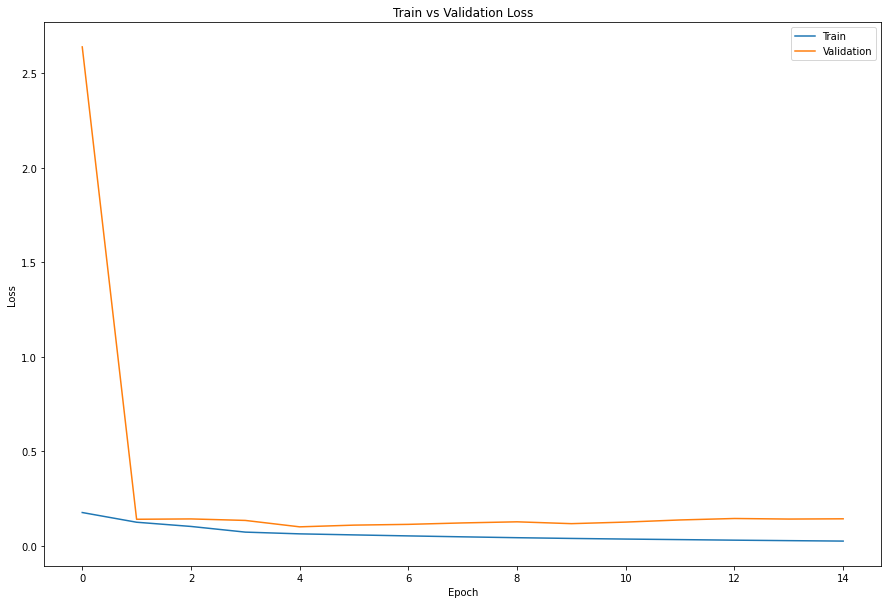

In [3]:
from matplotlib import pyplot as plt

# fog
y1 = [0.17483695793834678,
      0.12348641190224445,
      0.10119015090878795,
      0.07116496987054058,
      0.0619713526468075,
      0.05647096805372286,
      0.05114766422699168,
      0.04622934371019605,
      0.04164200832818352,
      0.03775317559734449,
      0.034398214892664286,
      0.03153653178021738,
      0.028590434080829983,
      0.02610530163581552,
      0.02370593074302418]

y2 = [2.637951374053955,
      0.1391345506104139,
      0.14096834331464309,
      0.1330178530456928,
      0.09908984320309873,
      0.10817347087252599,
      0.11219112499831961,
      0.11983312951185955,
      0.1256531249695959,
      0.11595106499197964,
      0.12421758179194652,
      0.13552436880015123,
      0.1432384341202963,
      0.14025389370866692,
      0.1415902213909878]

x = list(range(0,len(y1)))

plt.figure(figsize=(15,10))
plt.plot(x, y1, label = "Train")
plt.plot(x, y2, label = "Validation")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.show()

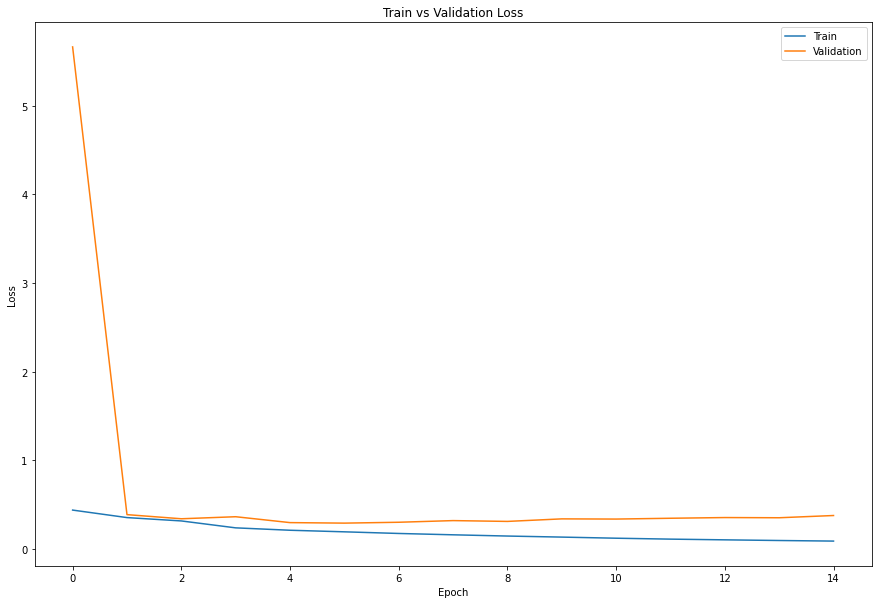

In [4]:
# rain
y1 = [0.43871650569705084,
      0.35407650851114575,
      0.3162381831414061,
      0.23819700293504661,
      0.21122636215922705,
      0.19345292062218725,
      0.17493614464835391,
      0.1598592849672248,
      0.14581003937372977,
      0.13396400773489178,
      0.12141588871468333,
      0.11101071658827057,
      0.1030203954012778,
      0.09552733468911105,
      0.08892531530999932]

y2 = [5.663749677687884,
      0.38740798565559087,
      0.34071120764128865,
      0.36376590668223796,
      0.2973653349559754,
      0.29157865510787817,
      0.30139002823270855,
      0.32004543803632257,
      0.31092269090004265,
      0.33954867196734995,
      0.33739192606881263,
      0.34651927534723653,
      0.35437328089028597,
      0.3521860182401724,
      0.37745090706739576]

x = list(range(0,len(y1)))

plt.figure(figsize=(15,10))
plt.plot(x, y1, label = "Train")
plt.plot(x, y2, label = "Validation")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.show()

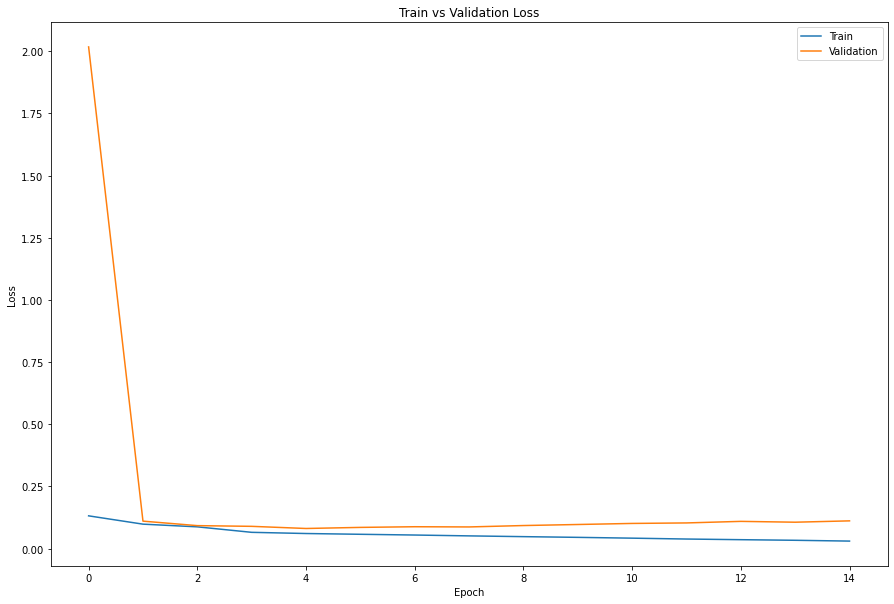

In [6]:
# sunny
y1 = [0.1318924863740078,
      0.09849277038089743,
      0.0876578132635984,
      0.06561021227701574,
      0.060828953391717906,
      0.05772744293263809,
      0.05473714058874003,
      0.05131366526258726,
      0.0482553618412521,
      0.04539755778075188,
      0.04216213851084487,
      0.03863721665141596,
      0.03602875001694215,
      0.033623549185531024,
      0.03037717038495669]

y2 = [2.0175770881191997,
      0.11057387144873607,
      0.09251717360527724,
      0.08968839290608095,
      0.08106895003017763,
      0.08543709899305098,
      0.08810682708535018,
      0.08727712671728742,
      0.09290317320358633,
      0.0970968304439479,
      0.10137502732842961,
      0.10341350021678329,
      0.10967114614010257,
      0.10632051353736612,
      0.11170356731936835]

x = list(range(0,len(y1)))

plt.figure(figsize=(15,10))
plt.plot(x, y1, label = "Train")
plt.plot(x, y2, label = "Validation")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.show()

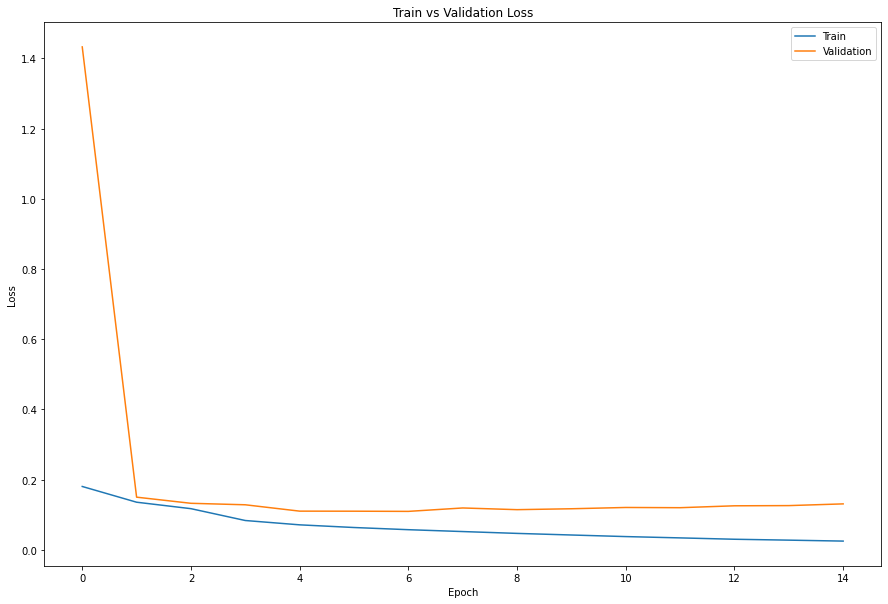

In [7]:
# night
y1 = [0.18067851814933505,
      0.13585277955167066,
      0.11744892258478283,
      0.08371835920732212,
      0.07139553741707551,
      0.06377831550253409,
      0.057571979854145326,
      0.05226160588250057,
      0.04701479779678042,
      0.0424462533725759,
      0.03794399787457794,
      0.034212827444332475,
      0.030338662166023617,
      0.02779630253342651,
      0.025097797632468603]

y2 = [1.432819583789021,
      0.1502185255086341,
      0.13275118858939935,
      0.12852564331169436,
      0.1104129620377912,
      0.11025226970843109,
      0.10973531943524167,
      0.11944497725767951,
      0.11461855353293371,
      0.1172064790362809,
      0.12086173240412153,
      0.12022137145201366,
      0.1256258759242134,
      0.12619434088012393,
      0.13108519597143745]

x = list(range(0,len(y1)))

plt.figure(figsize=(15,10))
plt.plot(x, y1, label = "Train")
plt.plot(x, y2, label = "Validation")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.show()